# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) #size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
print(len(cities))

632


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [4]:
query_url = f"{url}appid={api_key}&q={city}&units={units}"
#http://api.openweathermap.org/data/2.5/weather?appid=21aafc9309537de5b7b0d625f39105ad&q=payo&units=imperiallaon
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json

{'coord': {'lon': 1.01, 'lat': 20.2},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'model',
 'main': {'temp': 85.78,
  'pressure': 1011,
  'humidity': 17,
  'temp_min': 85.78,
  'temp_max': 85.78,
  'sea_level': 1011,
  'grnd_level': 955.66},
 'wind': {'speed': 12.92, 'deg': 24},
 'clouds': {'all': 0},
 'dt': 1571182506,
 'sys': {'country': 'ML', 'sunrise': 1571118632, 'sunset': 1571160766},
 'timezone': 0,
 'id': 2449893,
 'name': 'Tessalit',
 'cod': 200}

In [5]:
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [6]:
print(len(cities))

632


In [7]:
print('------------------------') 
print('Beginning Data Retrieval')
print('------------------------') 

count = 0 
limiter = 60

for x in range(len(cities)):
    
    if count == limiter:
        time.sleep(60)
        count = 0
    
    else:
        count += 1
    
        try:     
            response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid=21aafc9309537de5b7b0d625f39105ad&q={cities[x]}&units=imperial").json()
            city.append(cities[x])
            cloudiness.append(response["clouds"]["all"])
            country.append(response["sys"]["country"])
            date.append(response["dt"])
            humidity.append(response["main"]["humidity"])
            lat.append(response["coord"]["lat"])
            lng.append(response["coord"]["lon"])
            max_temp.append(response["main"]["temp_max"])
            wind_speed.append(response["wind"]["speed"])       
            print(f'Processing Record {x} for {cities[x]}')

        except (KeyError,NameError):
            print(''' 
             ___T_  ________________  
            | - - | |City not found!|   
            |__0__|/________________| 
           .=[::+]=.   
         ]=' [___] '=[ 
             /  |       
            _\  |_      ''')
        print('------------------------')         
        print('Data Retrieval Complete')        
        print('------------------------')        
        

------------------------
Beginning Data Retrieval
------------------------
Processing Record 0 for marzuq
------------------------
Data Retrieval Complete
------------------------
Processing Record 1 for longhua
------------------------
Data Retrieval Complete
------------------------
Processing Record 2 for ayan
------------------------
Data Retrieval Complete
------------------------
Processing Record 3 for severo-kurilsk
------------------------
Data Retrieval Complete
------------------------
Processing Record 4 for hermanus
------------------------
Data Retrieval Complete
------------------------
Processing Record 5 for nehe
------------------------
Data Retrieval Complete
------------------------
Processing Record 6 for encruzilhada do sul
------------------------
Data Retrieval Complete
------------------------
Processing Record 7 for tinaquillo
------------------------
Data Retrieval Complete
------------------------
Processing Record 8 for staryy nadym
------------------------

Processing Record 68 for sobolevo
------------------------
Data Retrieval Complete
------------------------
Processing Record 69 for ancud
------------------------
Data Retrieval Complete
------------------------
Processing Record 70 for hualmay
------------------------
Data Retrieval Complete
------------------------
Processing Record 71 for cherskiy
------------------------
Data Retrieval Complete
------------------------
Processing Record 72 for bolivar
------------------------
Data Retrieval Complete
------------------------
Processing Record 73 for balabac
------------------------
Data Retrieval Complete
------------------------
Processing Record 74 for sri aman
------------------------
Data Retrieval Complete
------------------------
Processing Record 75 for yar-sale
------------------------
Data Retrieval Complete
------------------------
Processing Record 76 for arraial do cabo
------------------------
Data Retrieval Complete
------------------------
Processing Record 77 for ki

 
             ___T_  ________________  
            | - - | |City not found!|   
            |__0__|/________________| 
           .=[::+]=.   
         ]=' [___] '=[ 
             /  |       
            _\  |_      
------------------------
Data Retrieval Complete
------------------------
Processing Record 135 for nushki
------------------------
Data Retrieval Complete
------------------------
Processing Record 136 for novikovo
------------------------
Data Retrieval Complete
------------------------
Processing Record 137 for san quintin
------------------------
Data Retrieval Complete
------------------------
Processing Record 138 for darnah
------------------------
Data Retrieval Complete
------------------------
Processing Record 139 for fortuna
------------------------
Data Retrieval Complete
------------------------
Processing Record 140 for marawi
------------------------
Data Retrieval Complete
------------------------
Processing Record 141 for namibe
------------------------

Processing Record 199 for novooleksiyivka
------------------------
Data Retrieval Complete
------------------------
Processing Record 200 for east london
------------------------
Data Retrieval Complete
------------------------
Processing Record 201 for nanortalik
------------------------
Data Retrieval Complete
------------------------
 
             ___T_  ________________  
            | - - | |City not found!|   
            |__0__|/________________| 
           .=[::+]=.   
         ]=' [___] '=[ 
             /  |       
            _\  |_      
------------------------
Data Retrieval Complete
------------------------
Processing Record 203 for iralaya
------------------------
Data Retrieval Complete
------------------------
 
             ___T_  ________________  
            | - - | |City not found!|   
            |__0__|/________________| 
           .=[::+]=.   
         ]=' [___] '=[ 
             /  |       
            _\  |_      
------------------------
Data Retrieval C

Processing Record 260 for premia de mar
------------------------
Data Retrieval Complete
------------------------
Processing Record 261 for morrinhos
------------------------
Data Retrieval Complete
------------------------
Processing Record 262 for lebu
------------------------
Data Retrieval Complete
------------------------
Processing Record 263 for tyrma
------------------------
Data Retrieval Complete
------------------------
Processing Record 264 for ryabovo
------------------------
Data Retrieval Complete
------------------------
Processing Record 265 for miracema do tocantins
------------------------
Data Retrieval Complete
------------------------
Processing Record 266 for flin flon
------------------------
Data Retrieval Complete
------------------------
Processing Record 267 for loukhi
------------------------
Data Retrieval Complete
------------------------
 
             ___T_  ________________  
            | - - | |City not found!|   
            |__0__|/________________

 
             ___T_  ________________  
            | - - | |City not found!|   
            |__0__|/________________| 
           .=[::+]=.   
         ]=' [___] '=[ 
             /  |       
            _\  |_      
------------------------
Data Retrieval Complete
------------------------
Processing Record 322 for itarema
------------------------
Data Retrieval Complete
------------------------
Processing Record 323 for ha tinh
------------------------
Data Retrieval Complete
------------------------
Processing Record 324 for homer
------------------------
Data Retrieval Complete
------------------------
Processing Record 325 for college
------------------------
Data Retrieval Complete
------------------------
Processing Record 326 for biggar
------------------------
Data Retrieval Complete
------------------------
Processing Record 327 for nurota
------------------------
Data Retrieval Complete
------------------------
Processing Record 328 for vardo
------------------------
Data R

Processing Record 390 for shaoguan
------------------------
Data Retrieval Complete
------------------------
Processing Record 391 for mantua
------------------------
Data Retrieval Complete
------------------------
Processing Record 392 for ziro
------------------------
Data Retrieval Complete
------------------------
Processing Record 393 for axim
------------------------
Data Retrieval Complete
------------------------
Processing Record 394 for mayo
------------------------
Data Retrieval Complete
------------------------
 
             ___T_  ________________  
            | - - | |City not found!|   
            |__0__|/________________| 
           .=[::+]=.   
         ]=' [___] '=[ 
             /  |       
            _\  |_      
------------------------
Data Retrieval Complete
------------------------
Processing Record 396 for kjollefjord
------------------------
Data Retrieval Complete
------------------------
Processing Record 397 for ribeira grande
-----------------------

Processing Record 452 for teguise
------------------------
Data Retrieval Complete
------------------------
 
             ___T_  ________________  
            | - - | |City not found!|   
            |__0__|/________________| 
           .=[::+]=.   
         ]=' [___] '=[ 
             /  |       
            _\  |_      
------------------------
Data Retrieval Complete
------------------------
Processing Record 454 for radviliskis
------------------------
Data Retrieval Complete
------------------------
Processing Record 455 for kerema
------------------------
Data Retrieval Complete
------------------------
Processing Record 456 for bocana de paiwas
------------------------
Data Retrieval Complete
------------------------
Processing Record 457 for bernau
------------------------
Data Retrieval Complete
------------------------
Processing Record 458 for jablah
------------------------
Data Retrieval Complete
------------------------
Processing Record 459 for saldus
----------------

 
             ___T_  ________________  
            | - - | |City not found!|   
            |__0__|/________________| 
           .=[::+]=.   
         ]=' [___] '=[ 
             /  |       
            _\  |_      
------------------------
Data Retrieval Complete
------------------------
Processing Record 517 for lata
------------------------
Data Retrieval Complete
------------------------
 
             ___T_  ________________  
            | - - | |City not found!|   
            |__0__|/________________| 
           .=[::+]=.   
         ]=' [___] '=[ 
             /  |       
            _\  |_      
------------------------
Data Retrieval Complete
------------------------
 
             ___T_  ________________  
            | - - | |City not found!|   
            |__0__|/________________| 
           .=[::+]=.   
         ]=' [___] '=[ 
             /  |       
            _\  |_      
------------------------
Data Retrieval Complete
------------------------
Processing Recor

Processing Record 580 for lenoir city
------------------------
Data Retrieval Complete
------------------------
Processing Record 581 for fairbanks
------------------------
Data Retrieval Complete
------------------------
Processing Record 582 for chernenko
------------------------
Data Retrieval Complete
------------------------
Processing Record 583 for itacare
------------------------
Data Retrieval Complete
------------------------
 
             ___T_  ________________  
            | - - | |City not found!|   
            |__0__|/________________| 
           .=[::+]=.   
         ]=' [___] '=[ 
             /  |       
            _\  |_      
------------------------
Data Retrieval Complete
------------------------
Processing Record 585 for yuzhou
------------------------
Data Retrieval Complete
------------------------
Processing Record 586 for lagoa
------------------------
Data Retrieval Complete
------------------------
Processing Record 587 for itapirapua
-----------------

In [8]:
print(len(country))

545


In [9]:
# create a data frame from cities, lat, and temp

weather_dict = ({
    "city": city,
    "cloudiness": cloudiness,
    "country": country,
    "dt": date,
    "humidity": humidity,
    "lat": lat,
    "lng": lng,
    "max_temp": max_temp,
    "wind_speed": wind_speed})

weather_data = pd.DataFrame.from_dict(weather_dict, orient='index').T
weather_data.head()

,city,cloudiness,country,dt,humidity,lat,lng,max_temp,wind_speed
0,marzuq,3,YE,1571182506,66,14.4,46.47,69.15,2.39
1,longhua,100,CN,1571182507,93,29.21,106.21,60.96,2.74
2,ayan,13,IR,1571182507,40,38.23,44.7,41.14,1.7
3,severo-kurilsk,80,RU,1571182507,76,50.68,156.12,36.82,32
4,hermanus,0,ZA,1571182354,94,-34.42,19.24,57,4


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_data.to_csv("output/CindyPendarvis_weatherData.csv", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

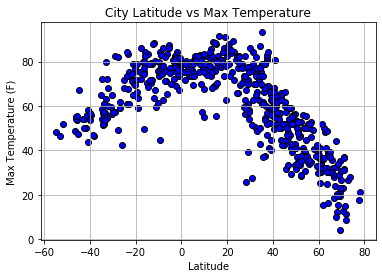

In [11]:
plt.scatter(lat, max_temp, marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("LatitudevsTemperature.png")

plt.show()

#### Latitude vs. Humidity Plot

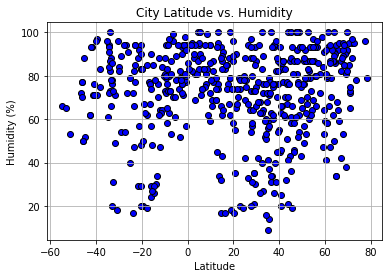

In [12]:
plt.scatter(lat, humidity, marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("LatitudevsHumidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

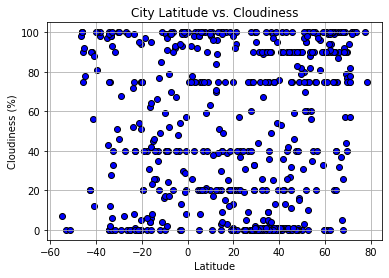

In [13]:
plt.scatter(lat, cloudiness, marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("LatitudevsCloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

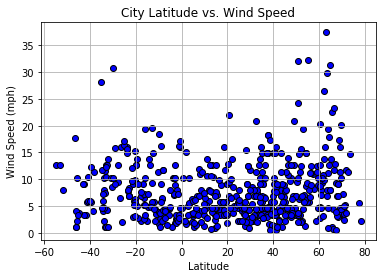

In [14]:
plt.scatter(lat, wind_speed, marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("LatitudevsWindSpeed.png")

plt.show()

Weather data analysis 
1. There is a correlation between latitude, and temperature.
2. There is no correlation between latitude, and humidity.
3. There is no correlation between latitude, and cloudiness 
